<a href="https://colab.research.google.com/github/Raju2004-chenchu/2303a52206_AIML/blob/main/LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Types of Each Feature:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary of the Dataset:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.0

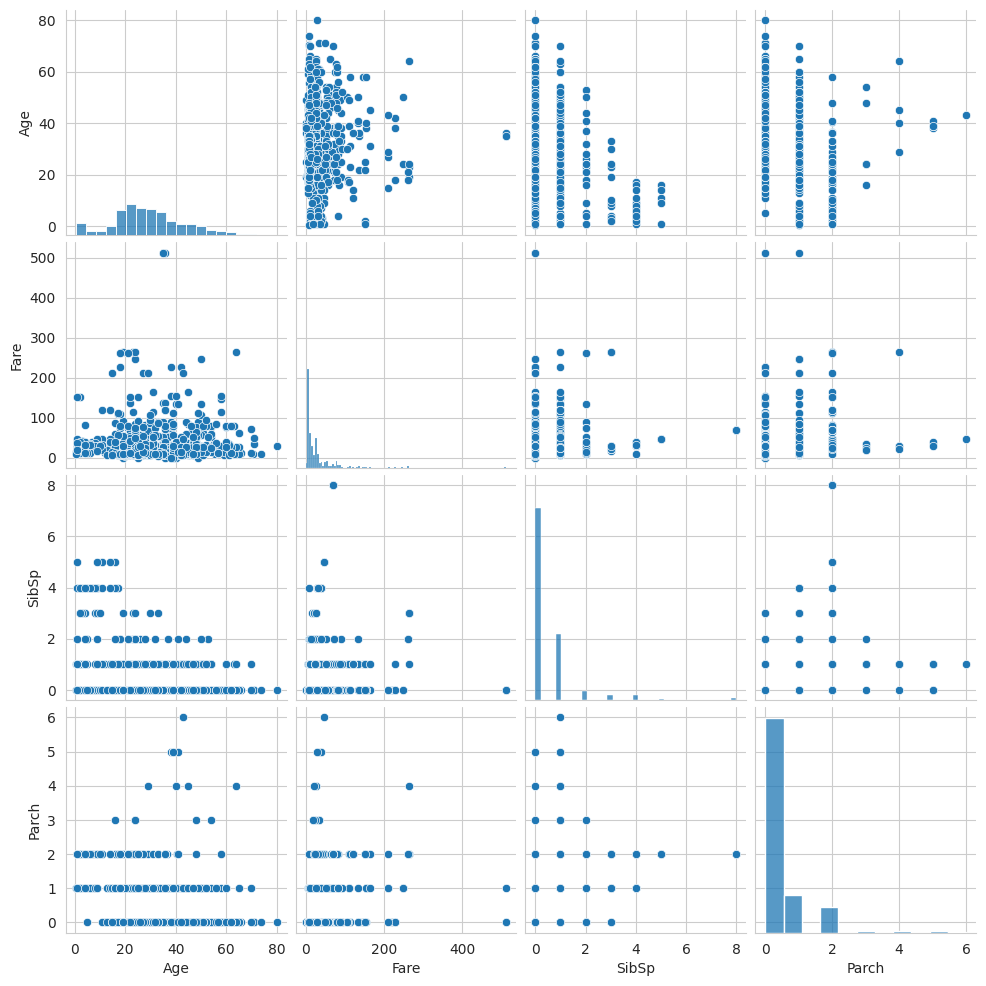

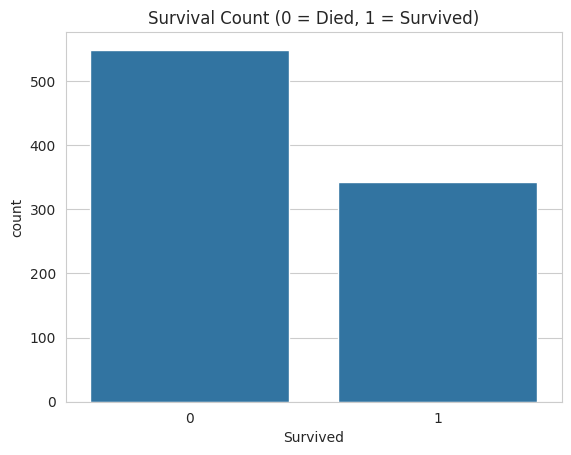

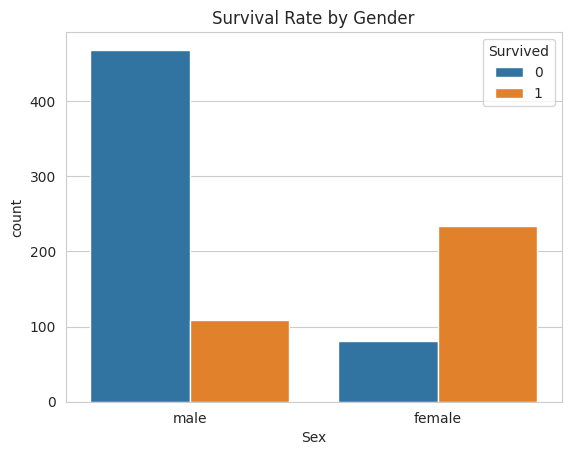

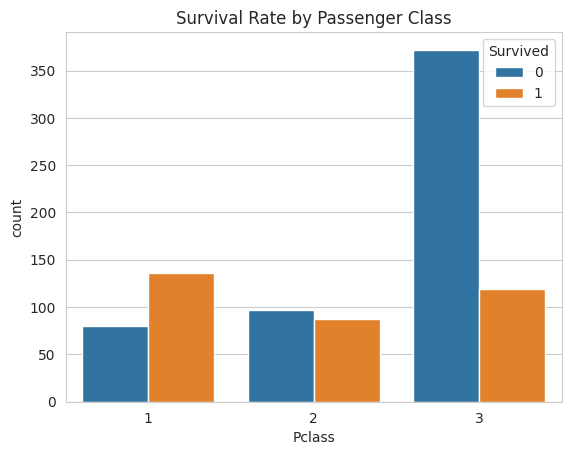

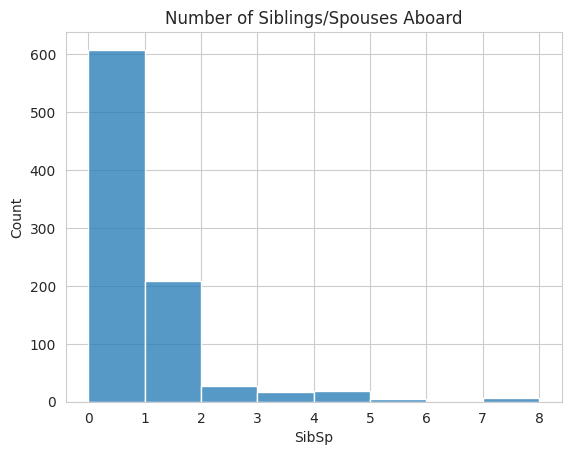

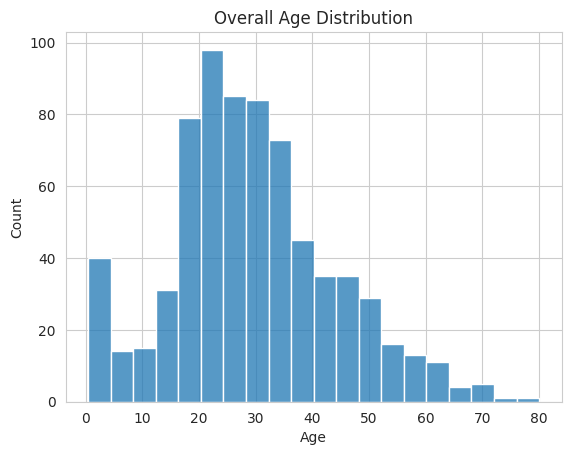

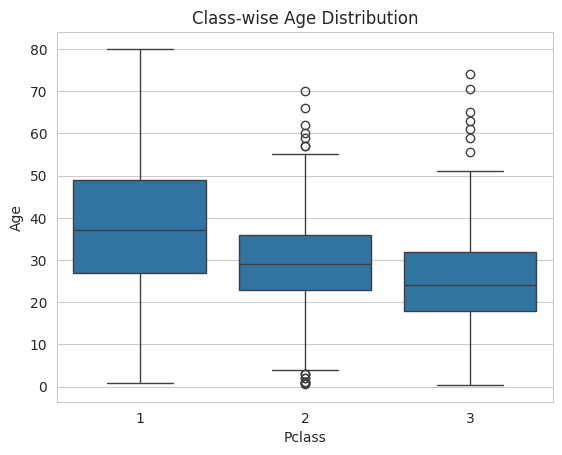


Accuracy: 0.8101

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
print("Data Types of Each Feature:\n", df.dtypes)
summary = df.describe(percentiles=[.25, .5, .75, .9])
print("\nSummary of the Dataset:\n", summary)
print("\nColumns/Features in the Dataset:\n", df.columns)
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.show()
sns.countplot(data=df, x='Survived')
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Rate by Gender")
plt.show()
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Rate by Passenger Class")
plt.show()
sns.histplot(df['SibSp'], kde=False, bins=8)
plt.title("Number of Siblings/Spouses Aboard")
plt.show()
sns.histplot(df['Age'].dropna(), kde=False, bins=20)
plt.title("Overall Age Distribution")
plt.show()
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title("Class-wise Age Distribution")
plt.show()
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


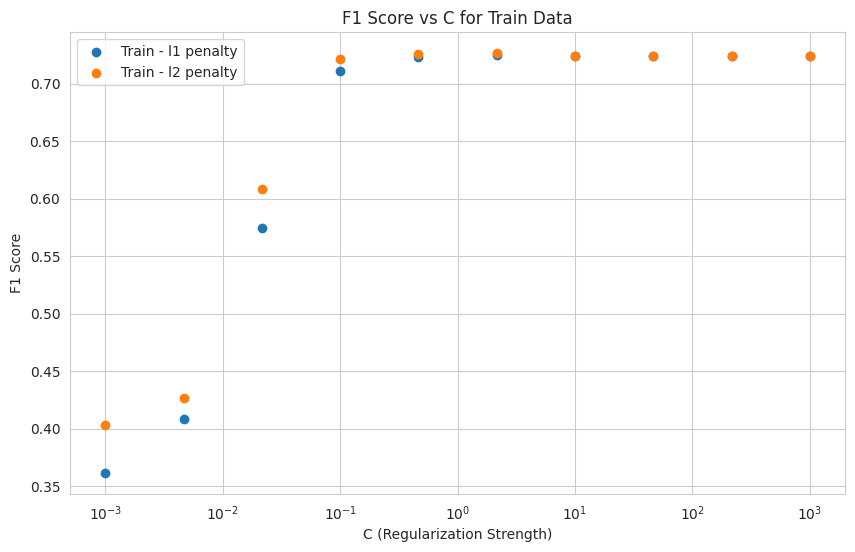

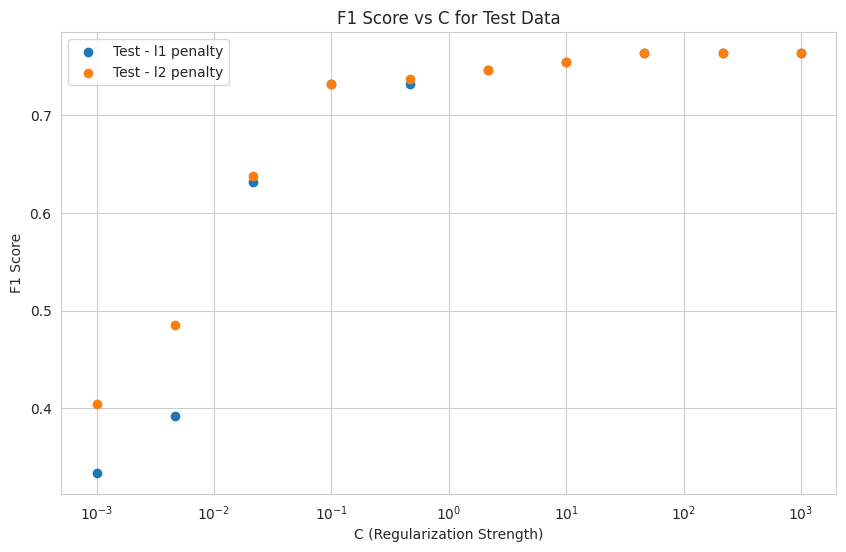

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

penalties = ['l1', 'l2']
f1_train_scores = []
f1_test_scores = []
C_values = np.logspace(-3, 3, 10)

for penalty in penalties:
    for C in C_values:
        logreg = LogisticRegression(penalty=penalty, solver='liblinear', C=C, max_iter=200)
        logreg.fit(X_train, y_train)
        y_train_pred = logreg.predict(X_train)
        y_test_pred = logreg.predict(X_test)

        f1_train = f1_score(y_train, y_train_pred)
        f1_test = f1_score(y_test, y_test_pred)
        f1_train_scores.append((penalty, C, f1_train))
        f1_test_scores.append((penalty, C, f1_test))
f1_train_df = pd.DataFrame(f1_train_scores, columns=['Penalty', 'C', 'F1 Score'])
f1_test_df = pd.DataFrame(f1_test_scores, columns=['Penalty', 'C', 'F1 Score'])
plt.figure(figsize=(10,6))
for penalty in penalties:
    penalty_data = f1_train_df[f1_train_df['Penalty'] == penalty]
    plt.scatter(penalty_data['C'], penalty_data['F1 Score'], label=f'Train - {penalty} penalty')

plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs C for Train Data')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10,6))
for penalty in penalties:
    penalty_data = f1_test_df[f1_test_df['Penalty'] == penalty]
    plt.scatter(penalty_data['C'], penalty_data['F1 Score'], label=f'Test - {penalty} penalty')

plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs C for Test Data')
plt.legend()
plt.grid(True)
plt.show()
